# Checking our contour integration with known functions

This showed that the SDP path contour implementation had an error.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf, plot_complex, plot_complex_surface
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact()

In [3]:
def f(x):
    return np.sin(x)

In [4]:
circ_contour = A.circular_contour(.75 + .5j, .4, 10)
Zs, dZdS, Ss = circ_contour['Zs'], circ_contour['dZdS'], circ_contour['Ss']
dS = Ss[1:] - Ss[:-1]

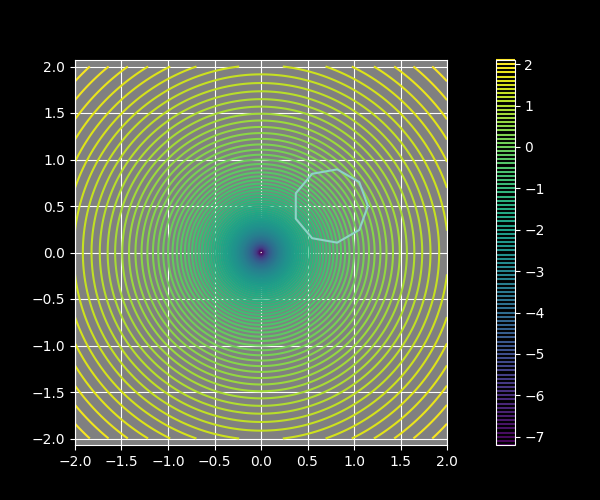

In [364]:
plt.close('all')
plot_complex(F, -2,2,-2,2, rref=100, iref=100, levels=100, figsize=(6,5), equal=True, log_abs=True)
plt.plot(Zs.real, Zs.imag);


In [365]:
left_int = np.sum(F(Zs)[:-1] * dZdS[:-1] * dS)
right_int = np.sum(F(Zs)[1:] * dZdS[1:] * dS)
trap_int = 1/2 * np.sum((F(Zs)[:-1] * dZdS[:-1] + F(Zs)[1:] * dZdS[1:] ) * dS)

left_int, right_int, trap_int

((1.8041124150158794e-16-1.1102230246251565e-16j),
 (1.1102230246251565e-16+0j),
 -1.6653345369377348e-16j)

## Check Box integral

In [401]:
N = int(4e4)


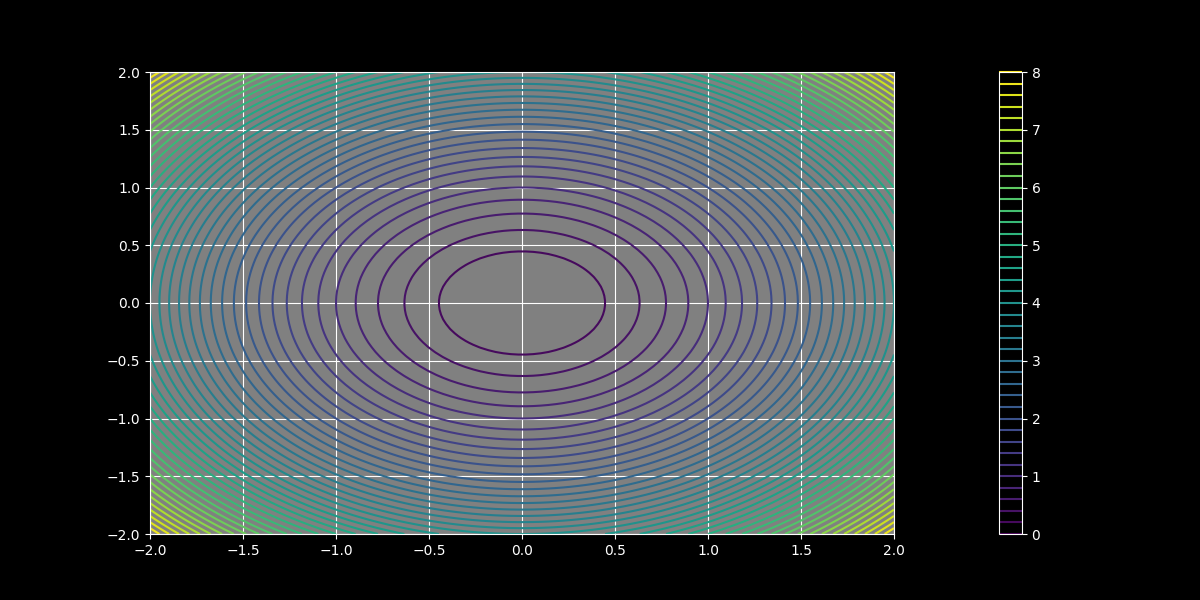

In [402]:
plt.close('all')
plot_complex(F, -2,2,-2,2, rref=100, iref=100, levels=50)


In [403]:
Zs, dZdS, Ss = A.real_contour(0, 1, N).values()
plt.plot(Zs.real, Zs.imag, linewidth=3);

dS = Ss[1:] - Ss[:-1]
exact_b = -np.cos(1) + np.cos(0)

left_int_b = np.sum(f(Zs)[:-1] * dZdS[:-1] * dS)
right_int_b= np.sum(f(Zs)[1:] * dZdS[1:] * dS)
trap_int_b = 1/2 * np.sum((f(Zs)[:-1] * dZdS[:-1] + f(Zs)[1:] * dZdS[1:] ) * dS)

exact_b-left_int_b, exact_b-right_int_b, exact_b-trap_int_b

(1.0518674220083568e-05, -1.0518626332611802e-05, 2.39437358828809e-11)

In [404]:
Zs, dZdS, Ss = A.vertical_contour(1, 0, 1, N).values()
plt.plot(Zs.real, Zs.imag, linewidth=3);

dS = Ss[1:] - Ss[:-1]

exact_r = -np.cos(1+1j) + np.cos(1)

left_int_r = np.sum(f(Zs)[:-1] * dZdS[:-1] * dS)
right_int_r = np.sum(f(Zs)[1:] * dZdS[1:] * dS)
trap_int_r = 1/2 * np.sum((f(Zs)[:-1] * dZdS[:-1] + f(Zs)[1:] * dZdS[1:] ) * dS)

exact_r-left_int_r, exact_r-right_int_r, exact_r-trap_int_r

((-7.937232082533274e-06+5.712423761794483e-06j),
 (7.937262649471144e-06-5.712526777279514e-06j),
 (1.5283441179292367e-11-5.150768700445951e-11j))

In [405]:
Zs, dZdS, Ss = A.horizontal_contour(1, 1, 0, N).values()
plt.plot(Zs.real, Zs.imag, linewidth=3);

dS = Ss[1:] - Ss[:-1]
exact_t = -np.cos(1j) + np.cos(1+1j)

left_int_t = np.sum(f(Zs)[:-1] * dZdS[:-1] * dS)
right_int_t= np.sum(f(Zs)[1:] * dZdS[1:] * dS)
trap_int_t = 1/2 * np.sum((f(Zs)[:-1] * dZdS[:-1] + f(Zs)[1:] * dZdS[1:] ) * dS)

exact_t-left_int_t, exact_t-right_int_t, exact_t-trap_int_t

((1.6231088598717136e-05-6.753186321817317e-06j),
 (-1.623116249294121e-05+6.753083306443308e-06j),
 (-3.6947112036500585e-11-5.1507798026761975e-11j))

In [406]:
Zs, dZdS, Ss = A.vertical_contour(0, 1, 0, N).values()
plt.plot(Zs.real, Zs.imag, linewidth=3);

dS = Ss[1:] - Ss[:-1]

exact_l = -np.cos(0) + np.cos(1j)

left_int_l = np.sum(f(Zs)[:-1] * dZdS[:-1] * dS)
right_int_l = np.sum(f(Zs)[1:] * dZdS[1:] * dS)
trap_int_l = 1/2 * np.sum((f(Zs)[:-1] * dZdS[:-1] + f(Zs)[1:] * dZdS[1:] ) * dS)

exact_l-left_int_l, exact_l-right_int_l, exact_l-trap_int_l

((-1.4690410467088633e-05+0j),
 (1.4690353893231922e-05+0j),
 (-2.8286928355214513e-11+0j))

In [407]:
left_ints = [left_int_b, left_int_r, left_int_t, left_int_l]
right_ints = [right_int_b, right_int_r, right_int_t, right_int_l]
trap_ints = [trap_int_b, trap_int_r, trap_int_t, trap_int_l]
exacts = [exact_b, exact_r, exact_t, exact_l]

In [408]:
left_int = sum(left_ints)
right_int = sum(right_ints)
trap_int = sum(trap_ints)
exact = sum(exacts)


In [409]:
left_int, right_int, trap_int, exact

((-4.122120269234308e-06+1.0407625600228343e-06j),
 (4.122172282849945e-06-1.0405565291637942e-06j),
 (2.600686332954183e-11+1.0301548503122149e-10j),
 0j)

## Check SDP integral

In [8]:
N = int(4e4)


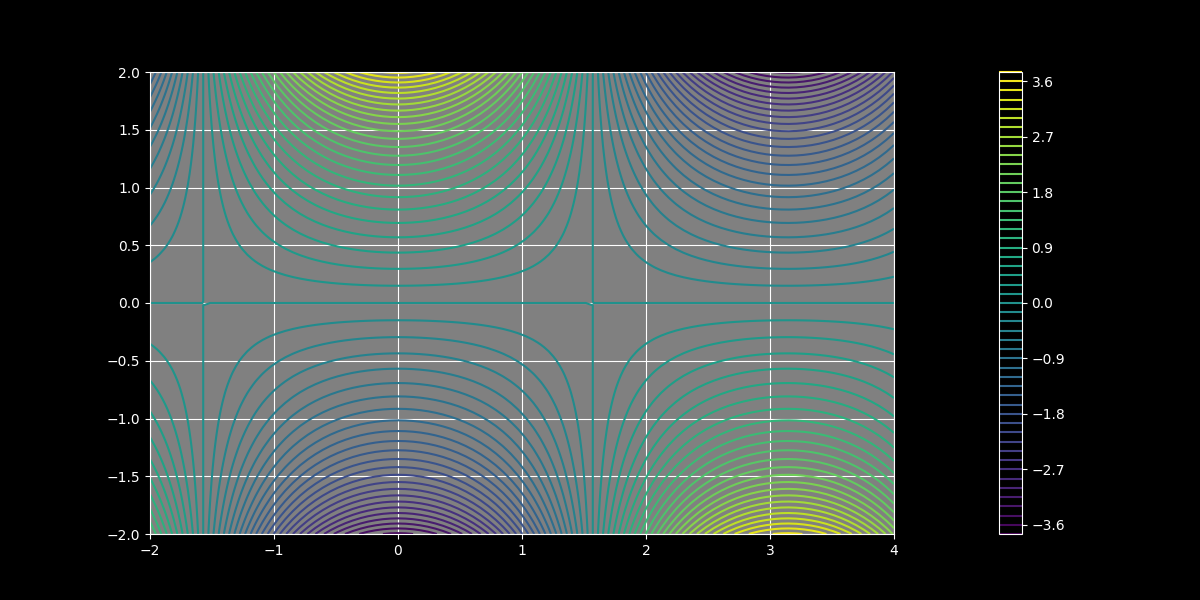

In [9]:
plt.close('all')
plot_complex(f, -2,4,-2,2, rref=100, iref=100, levels=50, part='imag')


In [51]:
Zs, dZdS, Ss = A.sdp_contour(0, 15, 1000, sdp_sign=1).values()
plt.plot(Zs.real, Zs.imag, linewidth=2);

Zs[-1], Zs[0]

((15+4.343449185860608j), 0j)

In [52]:
dS = Ss[1:] - Ss[:-1]
exact_sdp = -np.cos(Zs[-1]) + np.cos(Zs[0])

left_int_sdp = np.sum(f(Zs)[:-1] * dZdS[:-1] * dS)
right_int_sdp= np.sum(f(Zs)[1:] * dZdS[1:] * dS)
trap_int_sdp = 1/2 * np.sum((f(Zs)[:-1] * dZdS[:-1] + f(Zs)[1:] * dZdS[1:] ) * dS)

left_int_sdp, right_int_sdp, trap_int_sdp, exact_sdp

((30.048721716796454+25.2373059594637j),
 (30.43522513072792+24.807502717691207j),
 (30.241973423762197+25.022404338577473j),
 (30.242502111867175+25.022940528131738j))

May be an issue with SDP implementation

In [53]:
approx_dZdS = (Zs.imag[1:] - Zs.imag[:-1])/(Ss[1:] - Ss[:-1])

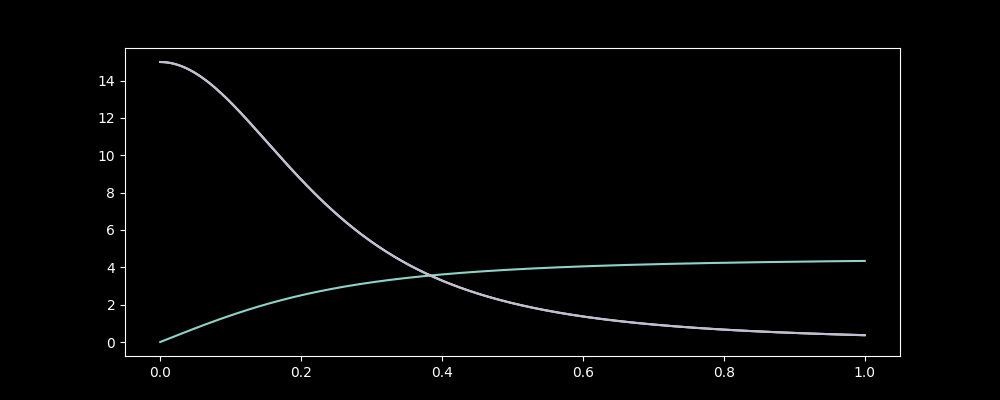

In [55]:
plt.close('all')
# Zs, dZdS, Ss = A.sdp_contour(0, 15, 10,   sdp_sign=1).values()

fig, ax = plt.subplots(1, figsize=(10,4))
ax.plot(Ss, Zs.imag)
ax.plot(Ss, dZdS.imag)
ax.plot(Ss[:-1], approx_dZdS)
# ax.plot(Ss, dZdS.real)


In [7]:
dZdS, dS



(array([15.+15.j        , 15.+12.40674044j, 15. +7.85213494j,
        15. +4.55311347j, 15. +2.6724331j , 15. +1.64064608j,
        15. +1.05843676j, 15. +0.71453977j, 15. +0.50168336j,
        15. +0.36418472j]),
 array([0.6981317, 0.6981317, 0.6981317, 0.6981317, 0.6981317, 0.6981317,
        0.6981317, 0.6981317, 0.6981317]))

In [25]:
x_start = 0
x_end = 1.5

s_start = 0
s_end = 1

N=4

if x_start == x_end:
    raise ValueError('Please provide non-trivial interval.')
Ss = np.linspace(s_start, s_end, N)
xs = x_start + (x_end - x_start) * (Ss - s_start) / (s_end - s_start)
ys = A.sdp_Z(xs, sdp_sign=-1)
Zs = xs + 1j * ys

dxds = (x_end - x_start) / (s_end - s_start) * np.ones(N)
dyds = A.sdp_derivative_Z(xs, sdp_sign=-1)

dZdS = dxds * (1 + 1j * dyds)
dS = Ss[1:] - Ss[:-1]
dxds[:-1] * dS, dZdS

(array([0.5, 0.5, 0.5]),
 array([1.5-1.5j       , 1.5-1.4730925j , 1.5-1.39701139j, 1.5-1.28392097j]))

In [22]:
A.sdp_derivative_Z(xs, sdp_sign=-1)

array([-1.        +0.j, -0.98206167+0.j, -0.93134093+0.j, -0.85594731+0.j])